In [20]:
import pandas as pd

#1 Load the dataset
df = pd.read_csv("TvMarketing.csv")

# Display first 5 rows
print(df.head())


      TV  Sales
0  230.1   22.1
1   44.5   10.4
2   17.2    9.3
3  151.5   18.5
4  180.8   12.9


In [21]:
# 2 Check column data types
import pandas as pd
df = pd.read_csv("TvMarketing.csv")
print(df.dtypes)


TV       float64
Sales    float64
dtype: object


In [22]:
# 3 Check shape of DataFrame
print(df.shape)


(200, 2)


In [23]:
#4  Look at summary statistics
print(df.describe())


               TV       Sales
count  200.000000  200.000000
mean   147.042500   14.022500
std     85.854236    5.217457
min      0.700000    1.600000
25%     74.375000   10.375000
50%    149.750000   12.900000
75%    218.825000   17.400000
max    296.400000   27.000000


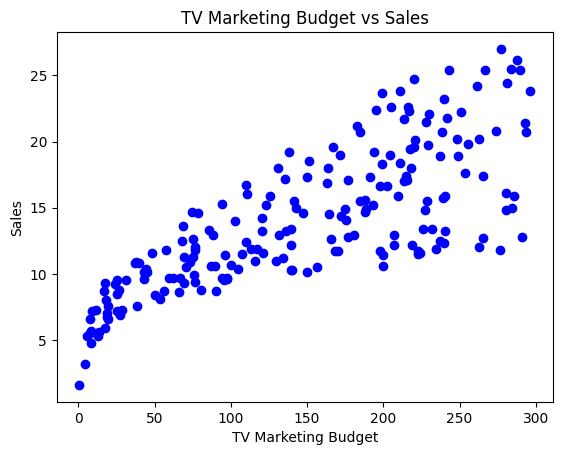

In [24]:
import matplotlib.pyplot as plt

# 5 Scatter plot of TV vs Sales
plt.scatter(df["TV"], df["Sales"], color='blue')
plt.xlabel("TV Marketing Budget")
plt.ylabel("Sales")
plt.title("TV Marketing Budget vs Sales")
plt.show()


In [25]:
#6 Define feature and response variable
X = df[["TV"]]  # Feature variable
y = df["Sales"]  # Response variable


In [26]:
from sklearn.model_selection import train_test_split

#7 Split dataset into train (70%) and test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [27]:
#8 Print the shape of train data and test data
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (140, 1) (140,)
Testing set shape: (60, 1) (60,)


In [28]:
#9.  Perform Linear Regression (on train data) without using any library and print the coefficients values
n = len(X_train)
X_mean = X_train.mean()
y_mean = y_train.mean()

num = ((X_train - X_mean) * (y_train - y_mean)).sum()
den = ((X_train - X_mean) ** 2).sum()

b1 = num / den  # Slope
b0 = y_mean - b1 * X_mean  # Intercept

print(f"Intercept (b0): {b0}")
print(f"Coefficient (b1): {b1}")

Intercept (b0): 0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
         ...    
194          NaN
196          NaN
198          NaN
199          NaN
TV     14.497143
Length: 141, dtype: float64
Coefficient (b1): 0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
      ... 
194    NaN
196    NaN
198    NaN
199    NaN
TV     0.0
Length: 141, dtype: float64


In [29]:
#10. Create the model using the calculated coefficients and make predictions on the testing set
y_pred_manual = b0 + b1 * X_test["TV"]
print(y_pred_manual.head())


0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
dtype: float64


In [37]:
from sklearn.linear_model import LinearRegression

# Initialize and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Get the slope (coefficient) and intercept
print("Slope (m):", model.coef_[0])
print("Intercept (c):", model.intercept_)

# Predict using the model
y_pred_sklearn = model.predict(X_test)


Slope (m): 0.046407802128152764
Intercept (c): 7.239459830751138


In [38]:
#11. Perform Linear Regression using library(sklearn)
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [39]:
#12. Print the intercept and coefficients 
print("Intercept:", lr.intercept_)
print("Coefficient:", lr.coef_[0])


Intercept: 7.239459830751138
Coefficient: 0.046407802128152764


In [40]:
#13. Make predictions on the testing set - y_pred
y_pred_sklearn = lr.predict(X_test)
print(y_pred_sklearn[:5])


[14.81785392 16.30754437 20.83230507  7.78243112 17.46309864]


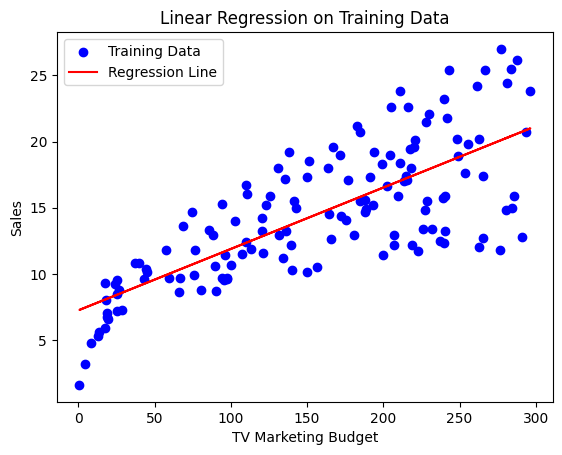

In [41]:
#14. Plot train data and the model 
plt.scatter(X_train, y_train, color='blue', label="Training Data")
plt.plot(X_train, lr.predict(X_train), color='red', label="Regression Line")
plt.xlabel("TV Marketing Budget")
plt.ylabel("Sales")
plt.title("Linear Regression on Training Data")
plt.legend()
plt.show()


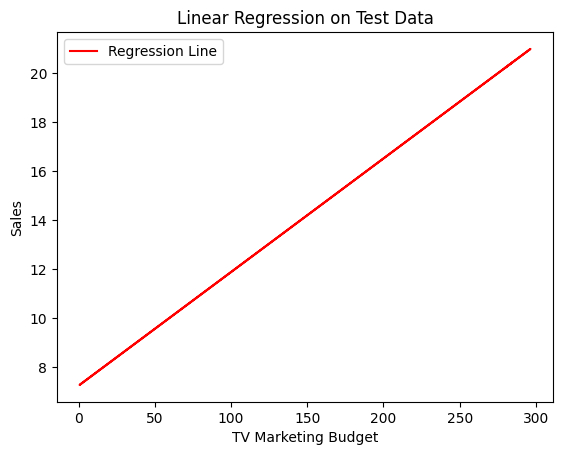

In [42]:

#15. Plot test data and the modelplt.scatter(X_test, y_test, color='green', label="Test Data")
plt.plot(X_train, lr.predict(X_train), color='red', label="Regression Line")
plt.xlabel("TV Marketing Budget")
plt.ylabel("Sales")
plt.title("Linear Regression on Test Data")
plt.legend()
plt.show()


In [43]:
#16. Print Mean Squared Error and R Squared Value 
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred_sklearn)
r2 = r2_score(y_test, y_pred_sklearn)

print(f"Mean Squared Error: {mse}")
print(f"R-Squared Value: {r2}")


Mean Squared Error: 8.970991242413614
R-Squared Value: 0.6714477229302764


In [44]:
#17. Calculate and print R Squared and Adjusted R Squared values without any library 
ss_total = ((y_test - y_test.mean()) ** 2).sum()
ss_residual = ((y_test - y_pred_manual) ** 2).sum()
r_squared_manual = 1 - (ss_residual / ss_total)

n = len(y_test)
p = 1  # Number of predictor variables
adj_r_squared_manual = 1 - ((1 - r_squared_manual) * (n - 1) / (n - p - 1))

print(f"Manual R-Squared: {r_squared_manual}")
print(f"Manual Adjusted R-Squared: {adj_r_squared_manual}")


Manual R-Squared: 1.0
Manual Adjusted R-Squared: 1.0
